In [1]:
#Load the Data
import pandas as pd

df = pd.read_csv("wingstop_sample_data.csv")


In [2]:
#nspect the Data
df.head()


,order_id,location,order_type,order_time,delivery_time_mins,order_value_usd,customer_rating,review_text,weekday,order_hour
0,1,Chicago,Delivery,2024-06-17 21:00:00,23,29.04,3.1,Excellent flavor!,Monday,21
1,2,Chicago,Delivery,2024-06-14 18:00:00,59,14.44,4.6,Okay service,Friday,18
2,3,Chicago,Dine-in,2024-06-02 20:00:00,37,35.38,1.7,Too slow,Sunday,20
3,4,Los Angeles,Delivery,2024-06-18 12:00:00,55,40.83,3.6,Great wings!,Tuesday,12
4,5,Los Angeles,Dine-in,2024-06-01 20:00:00,33,10.12,4.2,Okay service,Saturday,20


In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            100 non-null    int64  
 1   location            100 non-null    object 
 2   order_type          100 non-null    object 
 3   order_time          100 non-null    object 
 4   delivery_time_mins  100 non-null    int64  
 5   order_value_usd     100 non-null    float64
 6   customer_rating     100 non-null    float64
 7   review_text         100 non-null    object 
 8   weekday             100 non-null    object 
 9   order_hour          100 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.9+ KB


In [4]:
df.describe(include='all')

,order_id,location,order_type,order_time,delivery_time_mins,order_value_usd,customer_rating,review_text,weekday,order_hour
count,100.000000,100,100,100,100.000000,100.000000,100.000000,100,100,100.000000
unique,NaN,5,3,89,NaN,NaN,NaN,10,7,NaN
top,NaN,Chicago,Delivery,2024-06-29 14:00:00,NaN,NaN,NaN,Too slow,Saturday,NaN
freq,NaN,30,35,3,NaN,NaN,NaN,14,25,NaN
mean,50.500000,NaN,NaN,NaN,34.500000,31.319700,3.186000,NaN,NaN,16.240000
std,29.011492,NaN,NaN,NaN,13.172132,11.257717,1.178941,NaN,NaN,3.782255
min,1.000000,NaN,NaN,NaN,10.000000,10.120000,1.000000,NaN,NaN,10.000000
25%,25.750000,NaN,NaN,NaN,24.000000,21.500000,2.275000,NaN,NaN,13.000000
50%,50.500000,NaN,NaN,NaN,33.000000,33.090000,3.150000,NaN,NaN,16.000000
75%,75.250000,NaN,NaN,NaN,45.250000,39.710000,4.200000,NaN,NaN,20.000000


In [5]:
#Check for Missing Values
df.isnull().sum()


order_id              0
location              0
order_type            0
order_time            0
delivery_time_mins    0
order_value_usd       0
customer_rating       0
review_text           0
weekday               0
order_hour            0
dtype: int64

In [6]:
#check duplicates
df.duplicated().sum()



0

In [7]:
#Convert Data Types
#  Ensure order_time is datetime:
df['order_time'] = pd.to_datetime(df['order_time'])
df.order_time


0    2024-06-17 21:00:00
1    2024-06-14 18:00:00
2    2024-06-02 20:00:00
3    2024-06-18 12:00:00
4    2024-06-01 20:00:00
             ...        
95   2024-06-23 11:00:00
96   2024-06-17 13:00:00
97   2024-06-03 10:00:00
98   2024-06-18 22:00:00
99   2024-06-16 10:00:00
Name: order_time, Length: 100, dtype: datetime64[ns]

In [8]:
#Feature Engineering
#Extract useful time-based features
df['weekday'] = df['order_time'].dt.day_name()
df.weekday

0       Monday
1       Friday
2       Sunday
3      Tuesday
4     Saturday
        ...   
95      Sunday
96      Monday
97      Monday
98     Tuesday
99      Sunday
Name: weekday, Length: 100, dtype: object

In [9]:
df['order_hour'] = df['order_time'].dt.hour
df.order_hour

0     21
1     18
2     20
3     12
4     20
      ..
95    11
96    13
97    10
98    22
99    10
Name: order_hour, Length: 100, dtype: int32

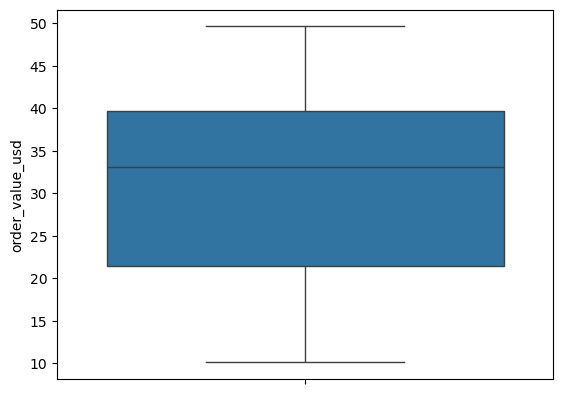

In [10]:
#Handle Outliers
#Check for outliers in numeric fields like order_value_usd or customer_rating
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['order_value_usd'])
plt.show()


In [11]:
#Detect and Remove Outliers (IQR Method)
# Step 1: Calculate Q1, Q3 and IQR
Q1 = df['order_value_usd'].quantile(0.25)
Q3 = df['order_value_usd'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['order_value_usd'] < lower_bound) | (df['order_value_usd'] > upper_bound)]
print("Outliers found:", len(outliers))

# Step 4: Remove outliers
df = df[(df['order_value_usd'] >= lower_bound) & (df['order_value_usd'] <= upper_bound)]

# Optional: Show shape difference
print("Before:", df.shape, "After:", df.shape)


Outliers found: 0
Before: (100, 10) After: (100, 10)


In [12]:
#df = pd.get_dummies(df, columns=['location'], prefix='location')
df = pd.get_dummies(df, columns=['weekday', 'location', ], prefix=['weekday', 'location'])


In [13]:
location_cols = [col for col in df.columns if col.startswith('location_')]
df[location_cols] = df[location_cols].astype(int)
weekday_cols = [col for col in df.columns if col.startswith('weekday_')]
df[weekday_cols] = df[weekday_cols].astype(int)


In [14]:
df.to_csv(r'C:\Users\kosgi Nandini\Desktop\Job Preparation/cleaned_wingstop_data2.csv', index=False)


In [15]:
df = pd.read_csv("cleaned_wingstop_data2.csv")
df.head()

,order_id,order_type,order_time,delivery_time_mins,order_value_usd,customer_rating,review_text,order_hour,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,location_Chicago,location_Houston,location_Los Angeles,location_New York,location_Phoenix
0,1,Delivery,2024-06-17 21:00:00,23,29.04,3.1,Excellent flavor!,21,0,1,0,0,0,0,0,1,0,0,0,0
1,2,Delivery,2024-06-14 18:00:00,59,14.44,4.6,Okay service,18,1,0,0,0,0,0,0,1,0,0,0,0
2,3,Dine-in,2024-06-02 20:00:00,37,35.38,1.7,Too slow,20,0,0,0,1,0,0,0,1,0,0,0,0
3,4,Delivery,2024-06-18 12:00:00,55,40.83,3.6,Great wings!,12,0,0,0,0,0,1,0,0,0,1,0,0
4,5,Dine-in,2024-06-01 20:00:00,33,10.12,4.2,Okay service,20,0,0,1,0,0,0,0,0,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              100 non-null    int64  
 1   order_type            100 non-null    object 
 2   order_time            100 non-null    object 
 3   delivery_time_mins    100 non-null    int64  
 4   order_value_usd       100 non-null    float64
 5   customer_rating       100 non-null    float64
 6   review_text           100 non-null    object 
 7   order_hour            100 non-null    int64  
 8   weekday_Friday        100 non-null    int64  
 9   weekday_Monday        100 non-null    int64  
 10  weekday_Saturday      100 non-null    int64  
 11  weekday_Sunday        100 non-null    int64  
 12  weekday_Thursday      100 non-null    int64  
 13  weekday_Tuesday       100 non-null    int64  
 14  weekday_Wednesday     100 non-null    int64  
 15  location_Chicago      10